# **Benford's Law Test for Financial Data**

## Overview
This Colab notebook performs a Benford's Law test on various financial columns of a dataset. Benford's Law, also known as the first-digit law, is a phenomenon where the leading digits in many sets of numerical data are not uniformly distributed.

## Code Description

### Import Libraries:



1.   **pandas**: For data manipulation and analysis.
2.   **numpy**: For numerical operations.
3.   **matplotlib.pyplot**: For data visualization.
4.   **log10 from math**: For calculating logarithms.







In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log10

### Load Dataset:

The code loads a dataset from a CSV file. Ensure to replace 'your_dataset.csv' with the correct path to your dataset.

In [2]:
# Load your dataset
# Replace 'your_dataset.csv' with the path to your dataset
file_path = "credit_test.csv"
df = pd.read_csv(file_path)

### Data Cleaning:


*   Drop rows with missing values.
*   Remove rows where 'Current Credit Balance' and 'Maximum Open Credit' start with '0'.





In [3]:
df = df.dropna()


In [4]:
# Drop rows where that amount starts with '0' and reset the index
df = df[~df['Current Credit Balance'].astype(str).str.startswith('0')].reset_index(drop=True)
df = df[~df['Maximum Open Credit'].astype(str).str.startswith('0')].reset_index(drop=True)


### Benford's Law Test Function:

Define a function benfords_law_test to perform Benford's Law analysis on a given dataset column.

In [5]:
# Function to extract the first digit of a number
def get_first_digit(num):
    return int(str(num)[0])

In [6]:
# Apply Benford's Law to the loan amount column in the dataset
def benfords_law_test(data):
    # Get the first digit of each loan amount
    first_digits = data.apply(get_first_digit)

    # Calculate the expected Benford's Law distribution
    benford_distribution = [log10(1 + 1/digit) for digit in range(1, 10)]

    # Calculate the observed distribution in the loan amount
    observed_distribution = first_digits.value_counts(normalize=True).sort_index()

    # Plot the expected and observed distributions
    plt.bar(range(1, 10), benford_distribution, label='Benford\'s Law (Expected)', color='blue', alpha=0.7)
    plt.bar(observed_distribution.index, observed_distribution, label='Loan Amount (Observed)', color='orange', alpha=0.7)

    plt.xlabel('First Digit')
    plt.ylabel('Frequency')
    plt.title('Benford\'s Law Test for Loan Amount')
    plt.legend()
    plt.show()

### Apply Benford's Law Test:

Apply the Benford's Law test to the following columns:


*   'Current Loan Amount'
*   'Current Credit Balance'
*   'Maximum Open Credit'
*   'Monthly Debt'







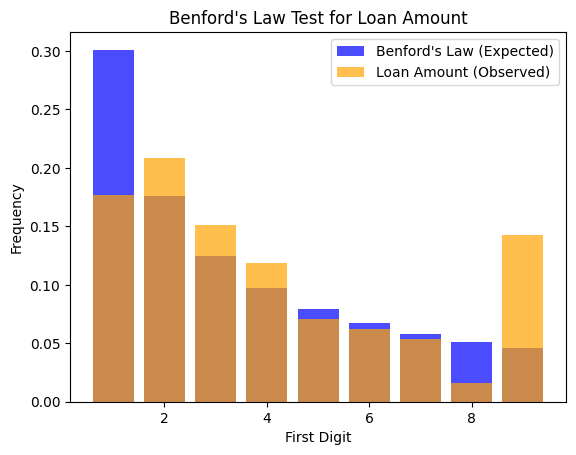

In [7]:
# Apply Benford's Law test to the 'Current Loan Amount' column
benfords_law_test(df['Current Loan Amount'])

**Note:** The observed distribution for values starting with '9' deviates significantly from Benford's Law. This suggests potential anomalies or irregularities in the data. It is advisable to flag these instances for further investigation.

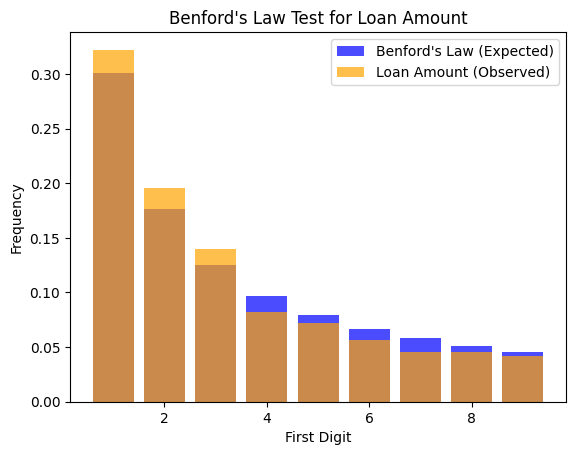

In [8]:
# Apply Benford's Law test to the 'Current Credit Balance' column
benfords_law_test(df['Current Credit Balance'])

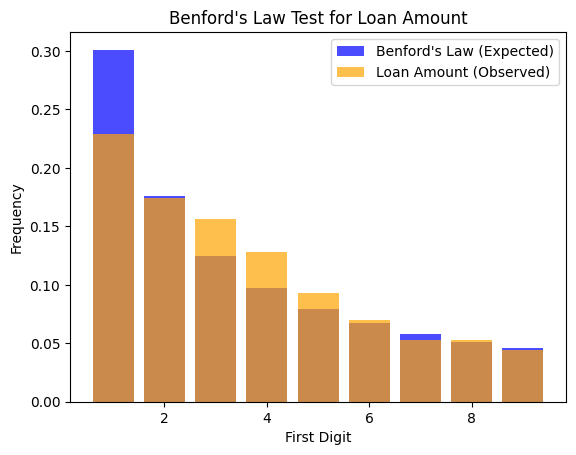

In [9]:
# Apply Benford's Law test to the 'Maximum Open Credit' column
benfords_law_test(df['Maximum Open Credit'])

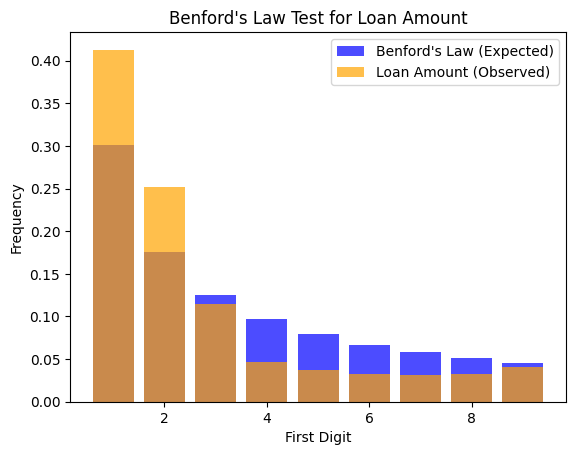

In [10]:
# Apply Benford's Law test to the 'Monthly Debt' column
benfords_law_test(df['Monthly Debt'])